# Attention Analysis

The goal is to check how the attention weights not affected by joint GPT are affected by hybrid GPT

In [8]:
#TODO: Take attention weights from Joint Transformer w/o Hybrid Attention
#TODO: Visualize, focus on those affected by a bidirectional context
#TODO: Compare to the Joint Transformer w/ Hybrid Attention

In [9]:
%cd ..

/home/adam/Projects/hybrid-transformer


In [10]:
import os
import torch
import wandb

from hybrid_transformer.configs.task import TaskConfig
from hybrid_transformer.configs.model import ModelConfig
from hybrid_transformer.configs.trainer import TrainerConfig
from hybrid_transformer.configs.logger import LoggerConfig

from hybrid_transformer.utils.datasets.auto import AutoDataset
from hybrid_transformer.utils.tokenizers.auto import AutoTokenizer
from hybrid_transformer.models.auto import AutoModel
from hybrid_transformer.utils.loggers.wandb import WandbLogger

from hybrid_transformer.trainers.trainer import Trainer

from scripts.pretrain.train import DEFAULT_CONFIG_FILES

from hybrid_transformer.utils.objectives.guacamol.objective import GUACAMOL_TASKS
from hybrid_transformer.models.prediction import PREDICTION_MODEL_CONFIGS
%load_ext autoreload
%autoreload 2

/home/adam/miniconda3/envs/hybrid-transformer/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-18 09:27:02.354548: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-18 09:27:02.413286: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-18 09:27:02.680741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 09:27:02.680781: E external/local_xla/xla/stream_executor/cu

In [11]:
# load data

task_config_path = lambda: f'./configs/tasks/guacamol/zaleplon/config.json'
task_config = TaskConfig.from_pretrained(task_config_path())
task_config.validate = False
task_config.split = 'test'
task_config.num_samples = 100
dataset = AutoDataset.from_config(task_config)
tokenizer = AutoTokenizer.from_config(task_config)                

print(f"Loaded {task_config.target_label} data.")

# load model
path_to_model_config = PREDICTION_MODEL_CONFIGS['HybridTransformer']
model_config = ModelConfig.from_pretrained(path_to_model_config)
 
# trainer
trainer_config = TrainerConfig.from_pretrained('./configs/trainers/debug/')
trainer_config.enable_save_checkpoint = False

model = AutoModel.from_config(model_config)
trainer = Trainer(config=trainer_config, model=model, train_dataset=dataset, eval_dataset=dataset, tokenizer=tokenizer)
trainer._train_init()
model.eval()
#     out_dir = f'./results/regression_task/guacamol/{model_name}/{guacamol_task}'
#     trainer_config.out_dir = out_dir
#     logger_config.name = model_name + '_' + guacamol_task
#     logger_config.project = 'debug'
#     logger_config.wandb_log = True
#     
#     dataset = AutoDataset.from_config(task_config)
#     logger = WandbLogger(logger_config, [task_config, model_config, trainer_config])
#     
#     results = trainer.test(dataset)
#     

        

Loaded zale data.
number of parameters: 38.06M
tokens per iteration will be: 512
Using cuda device
Random seed set to 1337
num decayed parameter tensors: 63, with 38,115,840 parameters
num non-decayed parameter tensors: 25, with 12,800 parameters
using fused AdamW: True
Compiling model..


HybridTransformer(
  (transformer): ModuleDict(
    (wte): Embedding(588, 512)
    (wpe): Embedding(128, 512)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x HybridTransformerBlock(
        (ln_1): LayerNorm()
        (attn_1): HybridSelfAttention(
          (q_proj): Linear(in_features=512, out_features=512, bias=False)
          (kv_proj): Linear(in_features=512, out_features=1024, bias=False)
          (out_proj): Linear(in_features=512, out_features=512, bias=False)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm()
        (mlp): MLP(
          (fc): Linear(in_features=512, out_features=2048, bias=False)
          (gelu): GELU(approximate='none')
          (proj): Linear(in_features=2048, out_features=512, bias=False)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm()
  )
  (lm_head): Linear(in_feature

In [20]:
task = 'mlm'
inputs = trainer.get_batch(split='val', task=task)

In [21]:
input_ids = inputs['input_ids']

In [22]:
input_ids

tensor([[ 2, 13, 13, 14, 12, 17, 12, 22, 12, 14, 13, 20, 18, 13, 14, 13, 22, 23,
         12, 14, 13, 15, 12, 12, 14, 13, 15, 22, 23, 15, 13, 13, 13, 18, 15, 41,
         17, 15, 14, 13, 15, 13,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 2, 12, 17, 12, 12, 12, 14, 28, 12, 18, 12, 22, 14, 20, 15, 12, 14, 31,
         13, 14, 13, 15, 13, 14, 20, 12, 23, 12, 14, 16, 13, 15, 12, 12, 12, 12,
         23, 15, 19, 16, 15, 22, 18, 15, 12, 12, 17,  3,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          

In [23]:
inputs

{'input_ids': tensor([[ 2, 13, 13, 14, 12, 17, 12, 22, 12, 14, 13, 20, 18, 13, 14, 13, 22, 23,
          12, 14, 13, 15, 12, 12, 14, 13, 15, 22, 23, 15, 13, 13, 13, 18, 15, 41,
          17, 15, 14, 13, 15, 13,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0],
         [ 2, 12, 17, 12, 12, 12, 14, 28, 12, 18, 12, 22, 14, 20, 15, 12, 14, 31,
          13, 14, 13, 15, 13, 14, 20, 12, 23, 12, 14, 16, 13, 15, 12, 12, 12, 12,
          23, 15, 19, 16, 15, 22, 18, 15, 12, 12, 17,  3,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

In [80]:
with torch.no_grad():
    outputs = model(input_ids=inputs['input_ids'], task=task)

In [81]:
attn_probs = outputs['attention_probabilities']

In [69]:
torch.stack(attn_probs).shape

torch.Size([12, 2, 8, 128, 128])

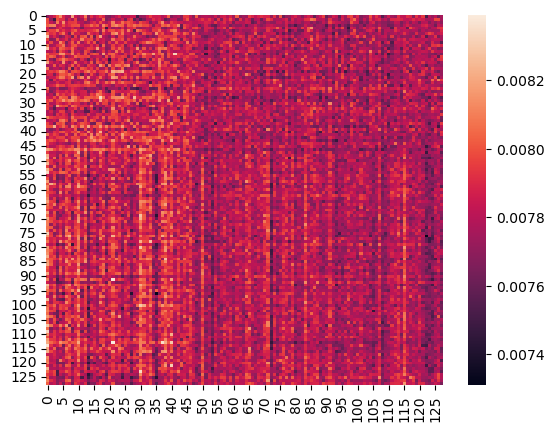

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(attn_probs.mean(dim=(0, 1, 2)).cpu().numpy(), linewidth=0.0005)
plt.show()

In [84]:
attn_probs.max()

tensor(0.0229)

In [2]:
num_examples_per_iter = 12 * 40
num_examples_data = 10000

In [5]:
21 * num_examples_per_iter

10080

In [6]:
num_iters_per_epoch = num_examples_data / num_examples_per_iter

In [7]:
num_iters_per_epoch

20.833333333333332

In [ ]:
# So 21 iters equal one epoch on Guacamol

In [25]:
50 * 20

1000

In [ ]:
max_mol_length = 128
conv_depth = 4,
conv_dim_depth = 8
conv_dim_width = 8
conv_d_growth_factor = 1.15875438383
conv_w_growth_factor = 1.1758149644
hg_growth_factor = 1.4928245388
hidden_dim = 100
middle_layer = 1


def encoder_model(params):



    # Convolution layers
    x = Convolution1D(int(conv_dim_depth *
                          conv_d_growth_factor']),
                      int(conv_dim_width *
                          conv_w_growth_factor']),
                      activation='tanh',
                      name="encoder_conv0")(x_in)
    if batchnorm_conv']:
        x = BatchNormalization(axis=-1, name="encoder_norm0")(x)

    for j in range(1, conv_depth - 1):
        x = Convolution1D(int(conv_dim_depth *
                              conv_d_growth_factor ** (j)),
                          int(conv_dim_width *
                              conv_w_growth_factor ** (j)),
                          activation='tanh',
                          name="encoder_conv{}".format(j))(x)
        if batchnorm_conv:
            x = BatchNormalization(axis=-1,
                                   name="encoder_norm{}".format(j))(x)

    x = Flatten()(x)

    # Middle layers
    if middle_layer > 0:
        middle = Dense(int(hidden_dim *
                           hg_growth_factor ** (middle_layer - 1)),
                       activation=activation, name='encoder_dense0')(x)
        if dropout_rate_mid > 0:
            middle = Dropout(dropout_rate_mid)(middle)
        if batchnorm_mid:
            middle = BatchNormalization(axis=-1, name='encoder_dense0_norm')(middle)

        for i in range(2, middle_layer + 1):
            middle = Dense(int(hidden_dim *
                               hg_growth_factor ** (middle_layer - i)),
                           activation=activation, name='encoder_dense{}'.format(i))(middle)
            if dropout_rate_mid > 0:
                middle = Dropout(dropout_rate_mid)(middle)
            if batchnorm_mid:
                middle = BatchNormalization(axis=-1,
                                            name='encoder_dense{}_norm'.format(i))(middle)
    else:
        middle = x

    z_mean = Dense(hidden_dim, name='z_mean_sample')(middle)

    # return both mean and last encoding layer for std dev sampling
    return Model(x_in, [z_mean, middle], name="encoder")


In [2]:
'HybridTransformer' in ['HybridTransformerBig']

False